 # Hackathon CNN
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : CNN \\
  Deadline      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1:
 - Integrante 2:
 - Integrante 3:
 - Integrante 4:


 ----

# Database

The database contains 4 folders: COVID, Normal, Lung_Opacity, and ViralPneumonia. [Download here](https://drive.google.com/file/d/1-RGTR_EEW1Unm2JzMCP7u0lXfenmuQaB/view?usp=sharing)






In [1]:
import torch.nn as nn
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
import math, os, torchvision, torch
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler
from PIL import Image

# Don't forget to enable the GPU to accelerate the training.

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)


cuda:0


In [12]:
# Install pyunpack to unzip the file covid.zip.
#!pip install pyunpack
# from google.colab import drive
from pyunpack import Archive
import os

# drive.mount('/content/drive/')
# Change the path of your file according to your Colab setup
# zip_file = '/content/drive/MyDrive/UTEC/CURSOS/2023.1/INTELIGENCIA ARTIFICIA/DataSet/covid_dataset.zip'
path = os.getcwd()
zip_file = path + '\\covid_dataset.zip'

destination = os.path.join(path, 'content')

if not os.path.exists(destination):
    os.makedirs(destination)

Archive(zip_file).extractall(destination)

# Show_img
This function will allow you to visually analyze lung images and the features generated during the convolution and pooling stages.

In [2]:
def Show_imgs(imgs, name,  size=3, color=True):
    color_m = 'jet'
    if color == False:
        color_m = 'gray'
    print('******************' + name + '*********************F****')
    img_numbers = imgs.shape[0]
    rows = cols = math.ceil(np.sqrt(img_numbers))

    fig = plt.figure(figsize=(rows*size, cols*size))
    for i in range(0, rows*cols):
        fig.add_subplot(rows, cols, i+1)
        if i < img_numbers:
            plt.imshow(imgs[i].detach(), cmap='gray')
    plt.show()

# Procesamiento
Esta función recibe las imágenes y la categoría y las corta de modo tal que todas tengán el mismo tamaño y tonalidades de color.

In [4]:
import os
from shutil import copyfile

raw_folder = os.getcwd() + '\\content\\COVID-19_Radiography_Dataset\\COVID-19_Radiography_Dataset'
destiny_folder = os.getcwd() + '\\preprocessed'

def process_images(category, subfolder):
    _raw_folder = os.path.join(raw_folder, category)
    _destiny_folder = os.path.join(destiny_folder, subfolder)

    if not os.path.exists(_destiny_folder):
        os.makedirs(_destiny_folder)

    image_list = os.listdir(_raw_folder)

    for image in image_list:
        image_path = os.path.join(_raw_folder, image)
        destiny_path = os.path.join(_destiny_folder, image)
        print(f'Processing {category} image: {image}')

        try:
            copyfile(image_path, destiny_path)

            im = Image.open(destiny_path)
            region = im.crop((100, 100, 1024, 1024))
            grayscale = region.convert('L')
            resized = grayscale.resize((256, 256), Image.LANCZOS)
            resized.save(destiny_path)
        except Exception as e:
            print(f"Error processing {category} image {image}: {e}")

process_images('Normal', 'normal')
process_images('COVID', 'covid')


Processing Normal image: Normal-1.png
Processing Normal image: Normal-10.png
Processing Normal image: Normal-100.png
Processing Normal image: Normal-1000.png
Processing Normal image: Normal-10000.png
Processing Normal image: Normal-10001.png
Processing Normal image: Normal-10002.png
Processing Normal image: Normal-10003.png
Processing Normal image: Normal-10004.png
Processing Normal image: Normal-10005.png
Processing Normal image: Normal-10006.png
Processing Normal image: Normal-10007.png
Processing Normal image: Normal-10008.png
Processing Normal image: Normal-10009.png
Processing Normal image: Normal-1001.png
Processing Normal image: Normal-10010.png
Processing Normal image: Normal-10011.png
Processing Normal image: Normal-10012.png
Processing Normal image: Normal-10013.png
Processing Normal image: Normal-10014.png
Processing Normal image: Normal-10015.png
Processing Normal image: Normal-10016.png
Processing Normal image: Normal-10017.png
Processing Normal image: Normal-10018.png
Pro

# Loader
This function is used to generate the train_loader and test_loader, as well as to normalize and convert all images into tensors for PyTorch.


In [5]:
# # This function will allow you to load and split your images into a test_loader and a train_loader

def load_images(images_path, batch_size, seed=10):
    transform = transforms.Compose([
        transforms.RandomResizedCrop(256),
        transforms.RandomHorizontalFlip(),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    #valid_extensions = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp']

    images_dataset = datasets.ImageFolder(images_path, transform=transform)

    for cls in images_dataset.classes:
        print(f'Class: {cls}')
        for img_path in images_dataset.imgs:
            if cls in img_path[0]:
                print(img_path[0])

    try:
        train_len = int(0.68 * len(images_dataset))
        test_len = len(images_dataset) - train_len

        train_dataset, test_dataset = random_split(images_dataset, [train_len, test_len], generator=torch.Generator().manual_seed(seed))
        train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size)
        test_loader = DataLoader(dataset=test_dataset, shuffle=False, batch_size=1)

        return train_loader, test_loader
    except ValueError as e:
        print(f"ValueError: {e}")
        return None, None

In [6]:
# Load the train and test sets
# You can adjust the batch size according to your needs
train_loader, test_loader = load_images(os.getcwd() + '\\preprocessed', batch_size=64)


Class: covid
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-10.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-100.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1000.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1001.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1002.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1003.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1004.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-100

# Create your CNN code.
Here, your team will implement your CNN.

- Use convolutional layers (convolution, relu, maxpooling)
- Vary between 2 to 4 layers and compare the results of each model
- Use at least 2 hidden layers at the end of your network. Keep in mind that the number of final neurons depends on the number of classes you are classifying.
- Analyze what Batch Normalization is used for and then apply it in your network.
  [link](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)
- Analyze what Dropout is used for and then apply it in some of your layers. [link](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
- Compare the results with those obtained without using Batch Normalization and Dropout.


In [151]:
# Hiperparámetros
num_classes = 2
learning_rate = 0.0001
num_epochs = 5
batch_size = 16

import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)  # kernel más grande
        self.bn1 = nn.BatchNorm2d(16)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layers
        self.fc1 = nn.Linear(64*32*32, 1024)  # Aumentamos el tamaño para las nuevas capas
        self.bn_fc1 = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(1024, 512)
        self.bn_fc2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.bn_fc3 = nn.BatchNorm1d(256)
        self.fc4 = nn.Linear(256, 128)
        self.bn_fc4 = nn.BatchNorm1d(128)
        self.fc5 = nn.Linear(128, num_classes)
        
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)

        x = x.view(-1, 64*32*32)
        
        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.dropout(x)
        
        x = F.relu(self.bn_fc2(self.fc2(x)))
        x = self.dropout(x)
        
        x = F.relu(self.bn_fc3(self.fc3(x)))
        x = self.dropout(x)
        
        x = F.relu(self.bn_fc4(self.fc4(x)))
        x = self.dropout(x)
        
        x = self.fc5(x)
 
        return x


# Train
This function is responsible for performing the training.

In [152]:

def train(model, train_loader, num_epochs):
    loss_vals = []
    # Here we are setting up the loss function and the optimizer.
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    running_loss = 0.0
    total_step = len(train_loader)
    list_loss = []
    list_time = []
    for epoch in range(num_epochs):
        model.train()
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            output = model(images)
            loss = loss_fn(output, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            list_loss.append(loss.item())
            list_time.append(i)
            i += 1

            if (i + 1) % 5 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

    print('Finished Training Trainset')
    return list_loss  # , loss_vals, list_time


In [153]:
model = CNN().to(device)
train_loader, test_loader = load_images(os.getcwd() + '\\preprocessed', batch_size)
list_loss = train(model, train_loader, num_epochs)

Class: covid
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-10.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-100.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1000.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1001.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1002.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1003.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-1004.png
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\LAB 13\preprocessed\covid\COVID-100

# Plots
Plot the loss function of your model.

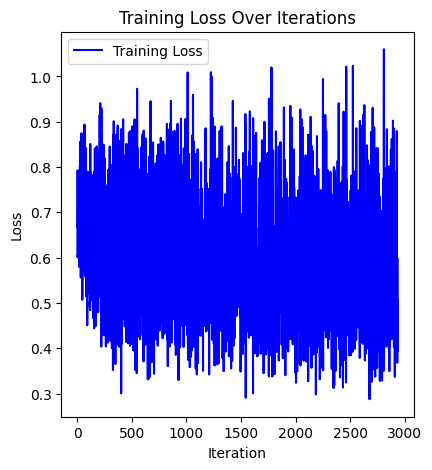

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the loss function
plt.figure(figsize=(10, 5))

# Plot the loss
plt.subplot(1, 2, 1)
plt.plot(list_loss, label='Training Loss', color='blue')
plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()




# Test
This code will allow you to test your model with the testing data.

In [155]:
def test(modelo,test_loader):
  modelo.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = modelo(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  test_accuracy = 100 * correct / total
  return test_accuracy, correct, total

test_accuracy, correct, total = test(model, test_loader)



# Plotting the test result
Plot the test result of your model.

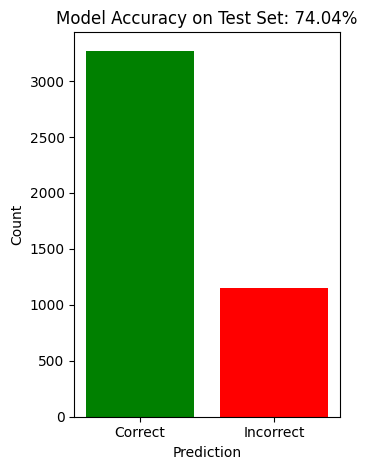

In [157]:

plt.subplot(1, 2, 2)
plt.bar(['Correct', 'Incorrect'], [correct, total - correct], color=['green', 'red'])
plt.title(f'Model Accuracy on Test Set: {test_accuracy:.2f}%')
plt.xlabel('Prediction')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Your team should report the best results on Discord and upload your Colab notebook to Google Drive.

----

## Good luck and enjoy learning 😊💪💪😊